# MDS7201

Data Analysis

Francisco Förster - Constanza Contreras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Analysis

## The problem

* What is the problem you want to solve?

* What are the KPIs?

![smart](smart.png)

## Preliminary analysis

* What data and how much data is available?

* Any missing values?

* Basic statistics

* What preprocessing is required? Can you scale the data to make it look normal?

* Can you add new sources of data?

* Can you visualize the data?

* Can you solve the problem just looking at the data?

## Detailed analysis

* Are the variables independent? If not, what are the correlations?

* Do you need to reduce the dimensionality of the data?

* Can you do unsupervised clustering?

* Is there a data imbalance problem? If so, can you fix it? (if supervised)

* If classification or regression, plot the variables divided by class or range of variable to predict.

* Do KS test to automatically identify the variables that are more relevant.

* Perform feature importance tests, e.g. training a random forest

# Example problem: ALeRCE dataset

# Preliminary analysis

## What data and how much is available?

We will use some data from the ALeRCE broker. This consists of features obtained from time series in two different bands. Some features cannot be computed, so they have NaN values.

In [2]:
df = pd.read_pickle("alerce_features.pkl")

In [3]:
df

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Meanvariance_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,g-r_mean
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aacjwvd,7.0,0.212099,0.991939,2.0,0.285714,0.0,1.852171,0.282442,0.154042,0.009554,...,8.827938e-05,2.378479e-02,0.288815,0.228689,-0.013572,0.000032,-0.002536,20.470861,185.723836,0.894564
ZTF17aadecrr,32.0,0.453344,1.000000,1.0,0.281250,0.0,0.014502,0.743876,97.969476,0.023251,...,1.113585e-04,2.051202e-02,0.620047,0.249795,0.102750,0.187446,0.000486,-8.541295,190.823524,1.143932
ZTF18adaksvf,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.268727e-04,2.028384e-02,0.525963,0.200540,-0.118095,0.029509,-0.000960,64.283014,275.075197,NaN
ZTF18abtqdih,15.0,0.177912,0.999373,1.0,0.333333,0.0,0.233757,0.247046,0.041649,0.008365,...,-3.396499e-05,6.059390e-08,0.618516,0.000000,0.000000,0.933567,-0.000193,-33.524391,127.583849,0.662915
ZTF18abshynt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.363979e-08,1.302898e-09,1.001022,0.000000,0.000000,0.001090,0.000237,13.026900,9.935559,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF17aaanuhy,8.0,0.111045,0.950989,1.0,0.125000,0.0,0.853863,0.127509,0.028829,0.005219,...,2.983995e-04,4.626888e-02,0.173013,0.310646,-0.007632,0.000008,0.000325,34.697494,205.016658,0.398861
ZTF18acaacpv,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.818813e-05,3.909905e-03,7.696414,0.269664,0.266392,0.817918,-0.003718,41.163437,194.764311,NaN
ZTF19aaerbju,9.0,0.178227,0.991310,1.0,0.333333,0.0,0.307194,0.203947,0.082581,0.007111,...,2.791623e-04,6.122792e-02,52.581127,5.677994,1.090091,0.985551,-0.005838,-7.265210,231.090396,1.847436


The dataframe has 86463 rows and 95 columns

In [4]:
df.shape

(86463, 95)

## Missing values

Let's count the number of NaNs:

<AxesSubplot:>

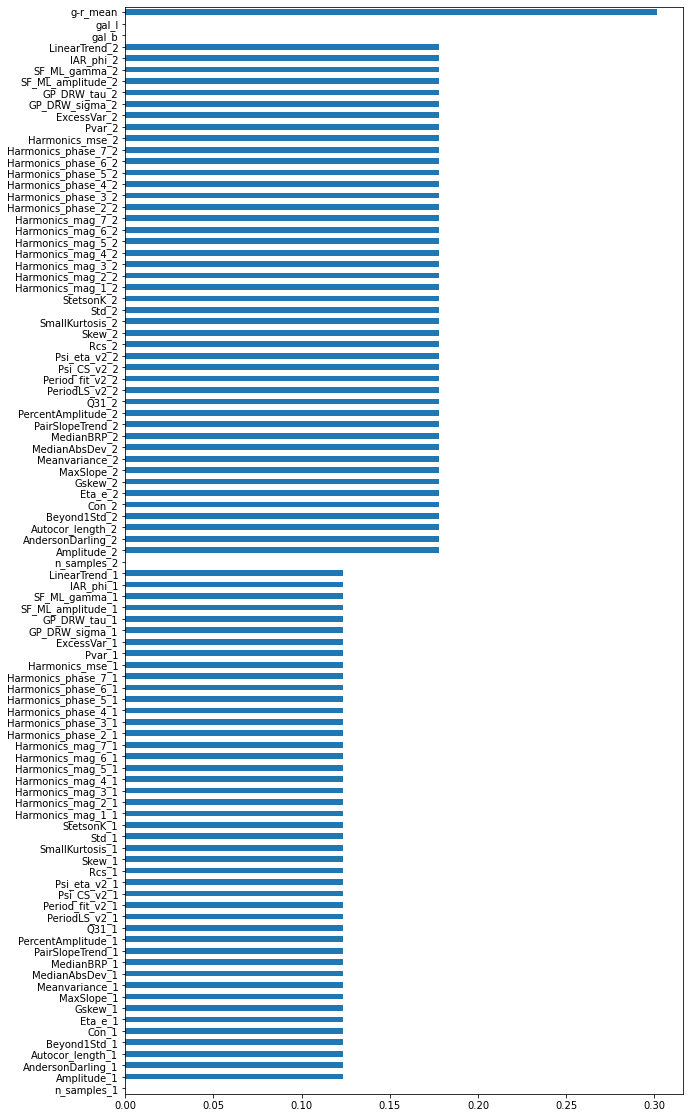

In [5]:
(df.isna().sum()/df.shape[0]).plot.barh(figsize=(10, 20))

Some columns have up to 30% of nan values!

We will avoid replacing nans until it is really needed.

In [6]:
df.shape[0]*df.shape[1]

8213985

In [7]:
df.isna().sum().sum()

1198577

## Basic statistics

In [8]:
dfstats = df.describe()
dfstats

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Meanvariance_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,g-r_mean
count,86463.000000,75780.000000,75780.000000,75780.000000,75780.000000,75780.000000,7.578000e+04,75780.000000,75780.000000,75780.000000,...,71090.000000,7.109000e+04,7.109000e+04,71090.000000,71090.000000,7.109000e+04,71090.000000,86463.000000,86463.000000,60407.000000
mean,25.842904,0.447738,0.909460,2.281671,0.336386,0.001736,1.206551e+00,0.015953,20.056828,0.017635,...,0.000544,1.798111e-01,1.787011e+02,4.337673,0.124988,5.528046e-01,0.000233,10.376143,121.294974,0.901443
std,29.172136,0.499513,0.193763,3.130619,0.114366,0.009264,1.390796e+00,0.659539,121.211759,0.019019,...,0.001398,5.000005e-01,2.101002e+04,920.253281,0.347825,4.338790e-01,0.005499,34.307677,89.683976,0.990209
min,0.000000,0.004421,0.094849,1.000000,0.000000,0.000000,2.931735e-08,-6.981345,0.000193,0.000168,...,-0.001677,8.687292e-38,2.057245e-28,0.000000,-1.591338,3.333655e-13,-0.334556,-89.494580,0.000827,-2.537891
25%,9.000000,0.179152,0.958184,1.000000,0.260870,0.000000,6.123156e-02,-0.210801,0.057189,0.007520,...,0.000052,1.298636e-02,2.288702e-01,0.139668,-0.010872,3.213185e-04,-0.000382,-13.116899,48.670078,0.234879
50%,17.000000,0.289976,0.999864,1.000000,0.333333,0.000000,6.755537e-01,0.011052,0.146221,0.012362,...,0.000127,3.096587e-02,1.707791e+00,0.249443,0.001237,7.301660e-01,0.000043,5.972341,98.348525,0.517542
75%,31.000000,0.486853,1.000000,2.000000,0.416667,0.000000,2.030816e+00,0.267446,0.425898,0.019220,...,0.000284,7.228399e-02,3.837723e+01,0.393746,0.138647,9.843570e-01,0.000489,35.895569,182.003288,1.152757
max,448.000000,4.017107,1.000000,67.000000,0.781250,0.130435,2.913481e+01,5.757630,5708.370485,0.192078,...,0.023951,1.473583e+01,5.384346e+06,245126.456574,25.915756,1.000000e+00,0.297328,89.897111,359.998765,6.273067


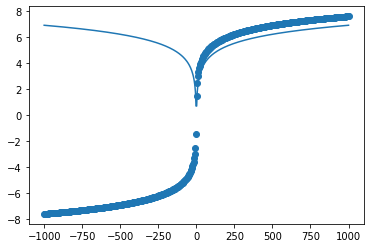

In [9]:
fig, ax = plt.subplots()
xs = np.linspace(-1e3, 1e3, 500)
ax.scatter(xs, np.arcsinh(xs))
ax.plot(xs, np.log(np.abs(xs)))

Let's look at boxplots for all the variables.

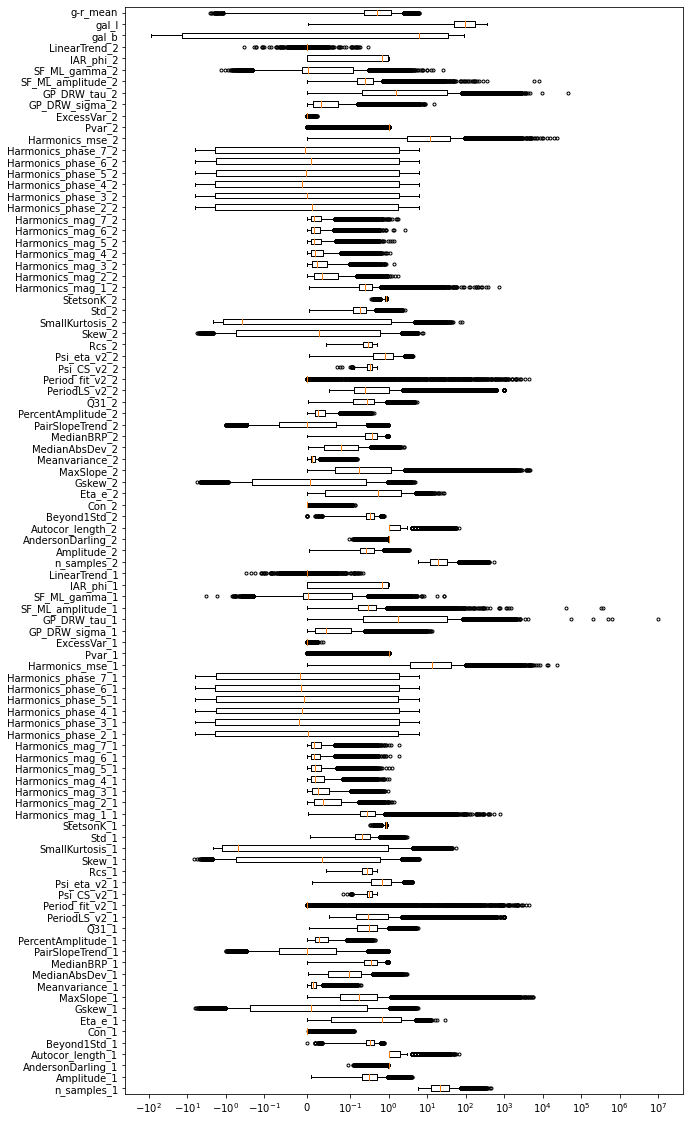

In [10]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.boxplot(df.dropna(), vert=False, labels=list(df), flierprops={'marker':'.'});
ax.set_xscale('symlog', linthresh=0.1)

Some variables need to be plotted in log-log to really understand their distribution

<AxesSubplot:ylabel='Frequency'>

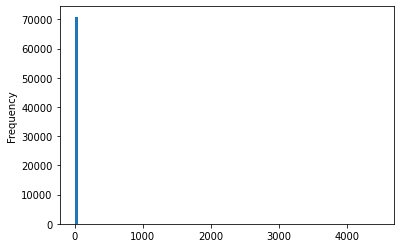

In [11]:
df.Period_fit_v2_2.plot.hist(bins=100)

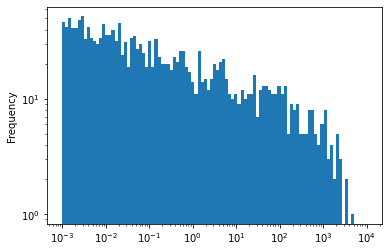

In [12]:
df.Period_fit_v2_2.plot.hist(log=True, bins=np.logspace(-3, 4, 100))
plt.xscale('log')

## Scaling the data to look normal

In [13]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler

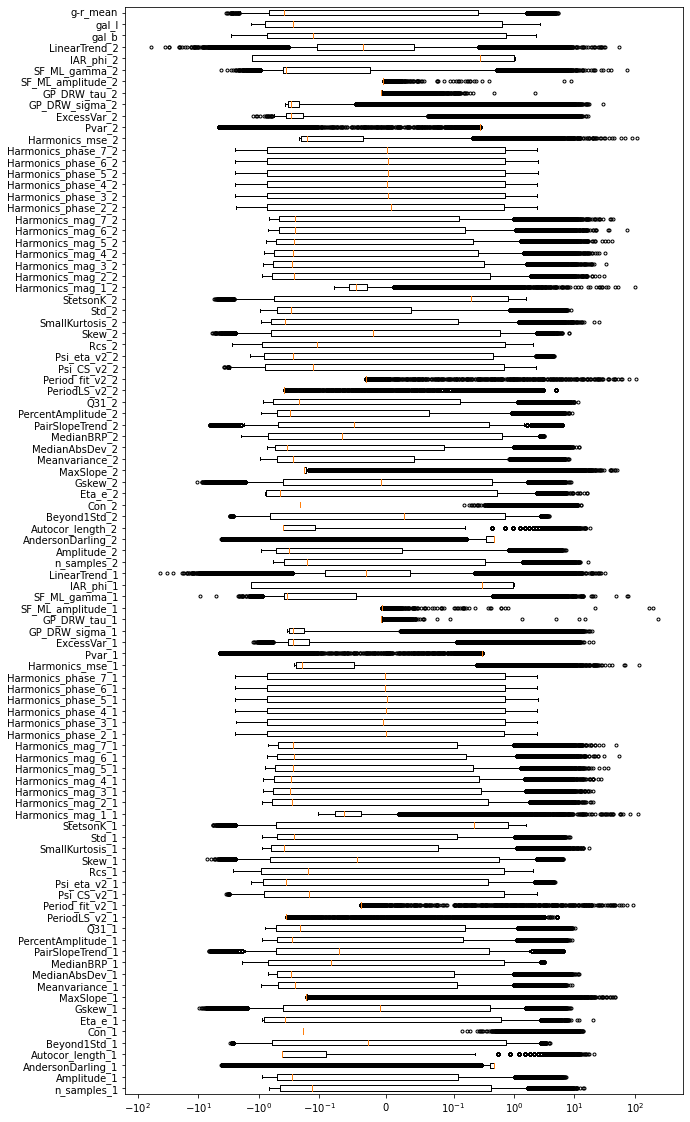

In [14]:
#scaler = RobustScaler().fit(df)
#scaler = QuantileTransformer().fit(df)
scaler = StandardScaler().fit(df)
dft = pd.DataFrame(data=scaler.transform(df), index=df.index, columns=list(df))
fig, ax = plt.subplots(figsize=(10, 20))
ax.boxplot(dft.dropna(), vert=False, labels=list(df), flierprops={'marker':'.'})
ax.set_xscale('symlog', linthresh=0.1)

Let's perform a normality test over all the columns

In [15]:
from scipy import stats

We will use the Shapiro-Wilk normality test (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). We will use  a sample of 500 rows to focus on those columns where the effect is stronger.

(array([252., 151.,  38.,   7.,  14.,  19.,   9.,   3.,   3.,   4.]),
 array([0.0054581 , 0.2991498 , 0.59284151, 0.88653322, 1.18022492,
        1.47391663, 1.76760834, 2.06130004, 2.35499175, 2.64868346,
        2.94237516]),
 <BarContainer object of 10 artists>)

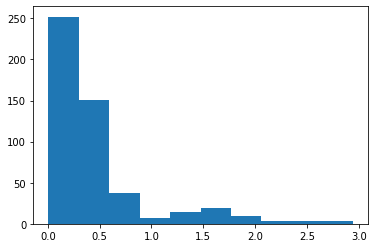

In [16]:
plt.hist(df.Amplitude_1.dropna().sample(500))

In [17]:
stats.shapiro(df.Amplitude_1.dropna().sample(500))

ShapiroResult(statistic=0.6757575869560242, pvalue=8.3445436262048e-30)

(-40.0, 0.0)

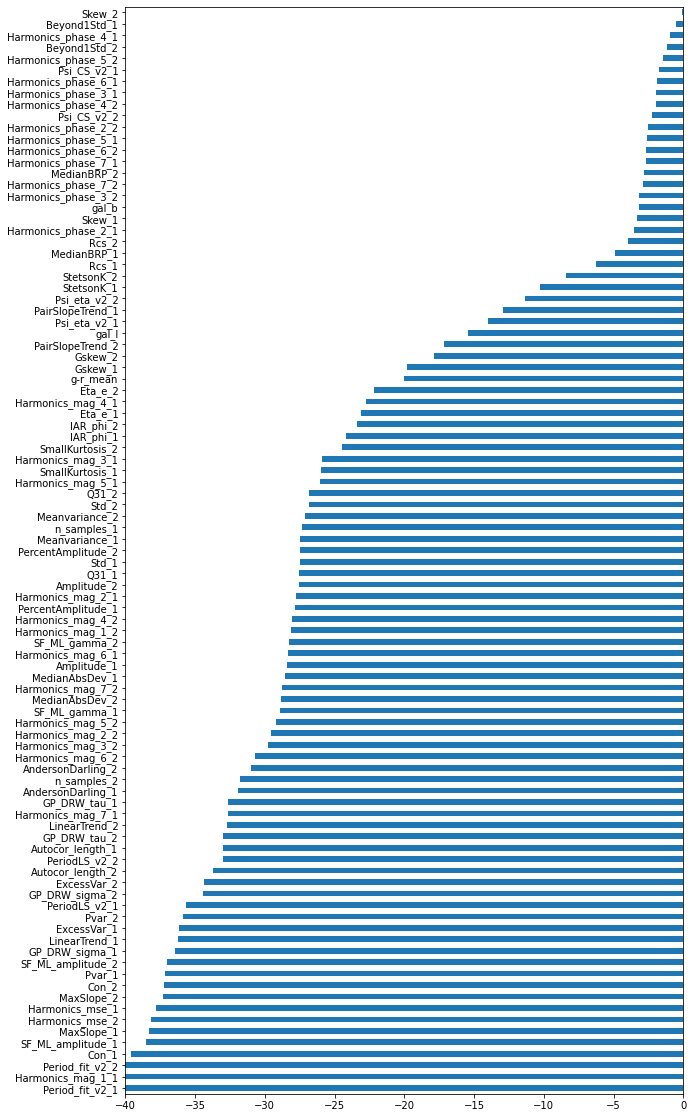

In [18]:
SW = dft.sample(500).apply(lambda col: np.log10(stats.shapiro(col.dropna()).pvalue), axis=0)
SW.sort_values().plot.barh(figsize=(10, 20))
plt.xlim(-40, 0)

Almost none of the columns are normally distributed!

Let's look at the least and most normally distributed columns:

In [19]:
SW.idxmax(), SW.idxmin()

('Skew_2', 'Period_fit_v2_1')

Skew_2


<AxesSubplot:ylabel='Frequency'>

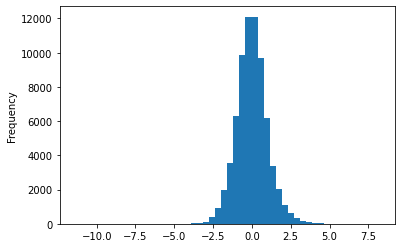

In [20]:
print(SW.idxmax())
dft[SW.idxmax()].plot.hist(bins=50)

Period_fit_v2_1


<AxesSubplot:ylabel='Frequency'>

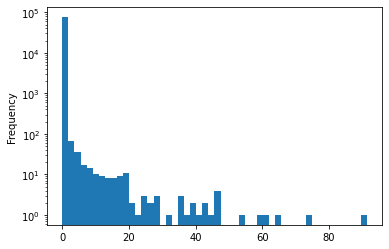

In [21]:
print(SW.idxmin())
dft[SW.idxmin()].plot.hist(bins=50, log=True)

Let's try to make all the variables more normal using the PowerTransformer

*Box Cox*

![BoxCox](boxcox.png)

*Yeo-Johnson*

![Yeo-Johnson](yeo-johnson.png)

![pt](powertransform.png)

![pt2](sklearn_powertransform.png)

In [22]:
from sklearn.preprocessing import PowerTransformer

In [23]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [24]:
power.fit(dft)

PowerTransformer()

In [25]:
dft2 = pd.DataFrame(data=power.transform(dft), columns=list(dft), index=dft.index)
dft2

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Meanvariance_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,g-r_mean
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aacjwvd,-0.955093,-0.499166,0.373622,0.802557,-0.444664,-0.22071,0.844280,0.403447,-0.416237,-0.368831,...,-0.491029,-0.492062,-0.630890,-0.266724,-0.464632,-1.224436,-0.503553,0.307904,0.870183,0.424335
ZTF17aadecrr,0.771323,0.601519,0.635775,-0.672678,-0.483611,-0.22071,-1.117924,1.104128,2.741603,0.897570,...,-0.369950,-0.560313,-0.620897,-0.196485,0.291853,-0.914472,0.055292,-0.541782,0.912366,0.695660
ZTF18adaksvf,-1.290629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.291415,-0.565129,-0.623732,-0.362616,-1.386720,-1.177709,-0.210625,1.550551,1.509126,NaN
ZTF18abtqdih,-0.205169,-0.718968,0.614497,-0.672678,-0.028798,-0.22071,-0.761193,0.349733,-0.443953,-0.544315,...,-1.223191,-1.024193,-0.620943,-1.124977,-0.362126,0.876122,-0.069241,-1.290509,0.307903,0.093570
ZTF18abshynt,-1.657279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.004292,-1.024194,-0.609445,-1.124977,-0.362126,-1.222770,0.009682,0.092464,-1.566266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF17aaanuhy,-0.849999,-1.200356,-0.621542,-0.672678,-1.843702,-0.22071,0.058173,0.168377,-0.447129,-1.067973,...,0.437302,-0.062679,-0.634392,-0.001653,-0.419296,-1.224473,0.025842,0.715525,1.025326,-0.387138
ZTF18acaacpv,-1.409343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.771990,-0.930797,-0.415376,-0.131629,0.958331,0.521180,-0.724987,0.899315,0.944365,NaN
ZTF19aaerbju,-0.748222,-0.716863,0.354193,-0.672678,-0.028798,-0.22071,-0.649616,0.284336,-0.433833,-0.742529,...,0.367373,0.187492,0.589647,3.260253,2.245395,1.044037,-1.125286,-0.503893,1.218096,1.200886


Let's look at the values of lambda obtained during the power transform.

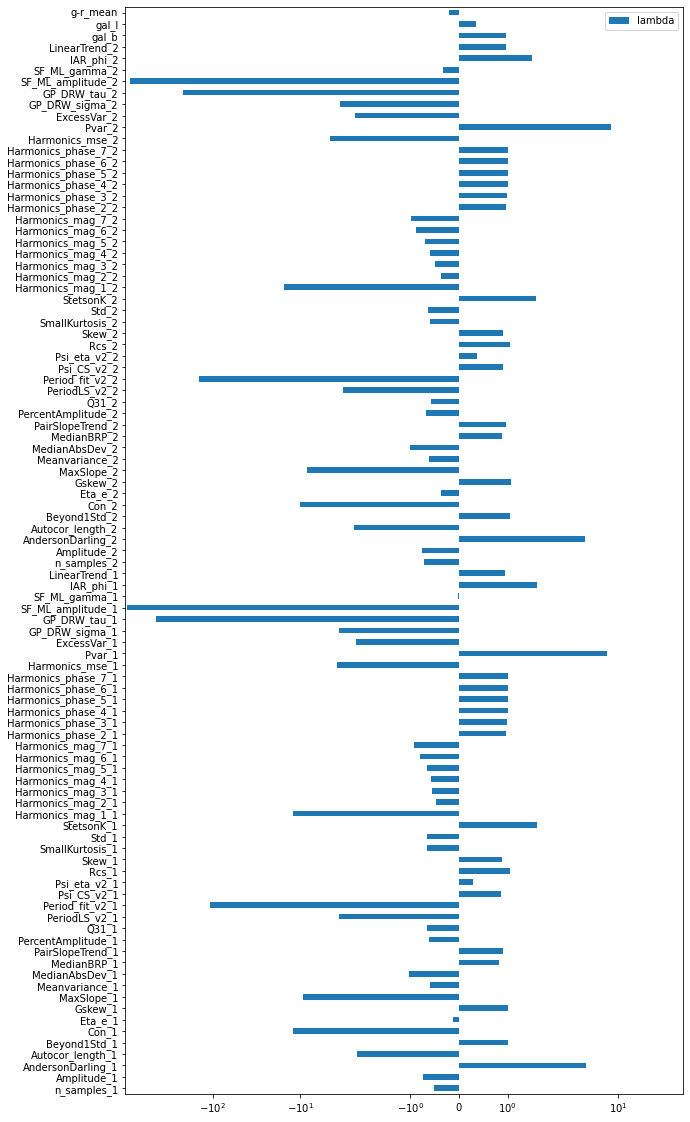

In [26]:
pd.DataFrame(data=power.lambdas_, columns=["lambda"], index=list(df)).plot.barh(figsize=(10, 20))
plt.xscale('symlog')

And let's repeat the normality tests

Skew_2


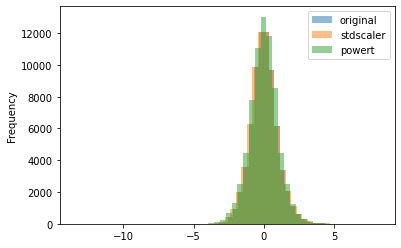

Period_fit_v2_1


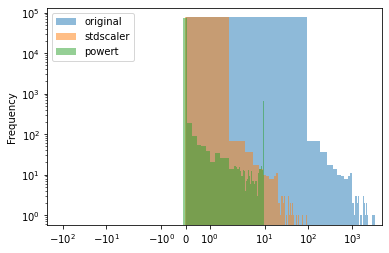

In [27]:
print(SW.idxmax())
df[SW.idxmax()].plot.hist(bins=50, label='original', alpha=0.5)
dft[SW.idxmax()].plot.hist(bins=50, label='stdscaler', alpha=0.5)
dft2[SW.idxmax()].plot.hist(bins=50, label='powert', alpha=0.5)
plt.legend()
plt.show()
print(SW.idxmin())
df[SW.idxmin()].plot.hist(bins=50, label='original', log=True, alpha=0.5)
dft[SW.idxmin()].plot.hist(bins=50, label='stdscaler', log=True, alpha=0.5)
dft2[SW.idxmin()].plot.hist(bins=50, label='powert', log=True, alpha=0.5)
plt.xscale('symlog')
plt.legend()

Let's repeat the normality tests

(-40.0, 0.0)

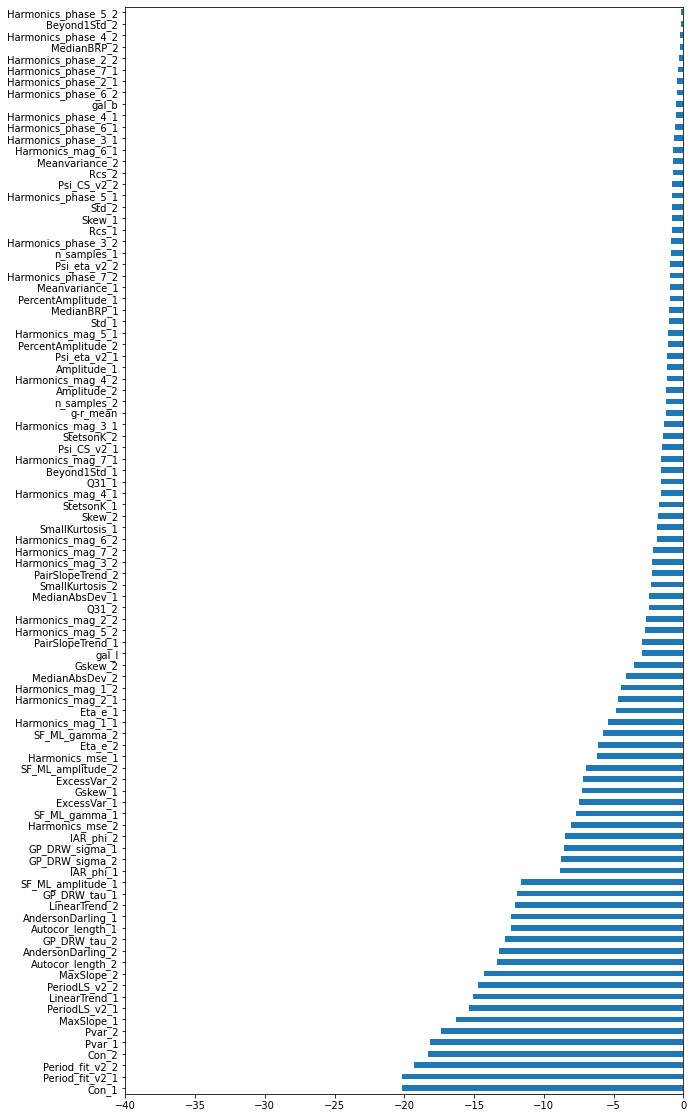

In [28]:
SW2 = dft2.sample(100).apply(lambda col: np.log10(stats.shapiro(col.dropna()).pvalue), axis=0)
SW2.sort_values().plot.barh(figsize=(10, 20))
plt.xlim(-40, 0)

The normality tests look much better now.

In [29]:
dft2

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Meanvariance_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,g-r_mean
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aacjwvd,-0.955093,-0.499166,0.373622,0.802557,-0.444664,-0.22071,0.844280,0.403447,-0.416237,-0.368831,...,-0.491029,-0.492062,-0.630890,-0.266724,-0.464632,-1.224436,-0.503553,0.307904,0.870183,0.424335
ZTF17aadecrr,0.771323,0.601519,0.635775,-0.672678,-0.483611,-0.22071,-1.117924,1.104128,2.741603,0.897570,...,-0.369950,-0.560313,-0.620897,-0.196485,0.291853,-0.914472,0.055292,-0.541782,0.912366,0.695660
ZTF18adaksvf,-1.290629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.291415,-0.565129,-0.623732,-0.362616,-1.386720,-1.177709,-0.210625,1.550551,1.509126,NaN
ZTF18abtqdih,-0.205169,-0.718968,0.614497,-0.672678,-0.028798,-0.22071,-0.761193,0.349733,-0.443953,-0.544315,...,-1.223191,-1.024193,-0.620943,-1.124977,-0.362126,0.876122,-0.069241,-1.290509,0.307903,0.093570
ZTF18abshynt,-1.657279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.004292,-1.024194,-0.609445,-1.124977,-0.362126,-1.222770,0.009682,0.092464,-1.566266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF17aaanuhy,-0.849999,-1.200356,-0.621542,-0.672678,-1.843702,-0.22071,0.058173,0.168377,-0.447129,-1.067973,...,0.437302,-0.062679,-0.634392,-0.001653,-0.419296,-1.224473,0.025842,0.715525,1.025326,-0.387138
ZTF18acaacpv,-1.409343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.771990,-0.930797,-0.415376,-0.131629,0.958331,0.521180,-0.724987,0.899315,0.944365,NaN
ZTF19aaerbju,-0.748222,-0.716863,0.354193,-0.672678,-0.028798,-0.22071,-0.649616,0.284336,-0.433833,-0.742529,...,0.367373,0.187492,0.589647,3.260253,2.245395,1.044037,-1.125286,-0.503893,1.218096,1.200886


## Can we add new sources of data?

In this example we have access to labels. We will use the column classALeRCE

In [30]:
labels = pd.read_pickle("alerce_labels.pkl")
labels

,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF17aacjwvd,EBSD/D,110.781010,32.731152,0.274475,CRTSnorth,1132034058094.0,EW,0.825588
ZTF17aadecrr,EBSD/D,84.621996,15.278831,13.7331552,ASASSN,ASASSN-V J053829.26+151643.6,EA,0.545213
ZTF18adaksvf,Periodic-Other,181.132578,3.978435,2.0862574,CRTSnorth,1104065024804.0,RS CVn,0.079960
ZTF18abtqdih,EBC,17.300849,29.186915,0.436716,CRTSnorth,1129006024828.0,EA,1.775974
ZTF18abshynt,LPV,260.213285,-13.648430,323.95870703543653,LPV_GAIA,4.138217108719302e+18,MIRA_SR,0.114101
...,...,...,...,...,...,...,...,...
ZTF17aaanuhy,EBSD/D,132.052846,21.120494,0.281411,CRTSnorth,1121045032117.0,EW,0.258035
ZTF18acaacpv,EBSD/D,136.654413,30.600012,0.312246,CRTSnorth,1129043053657.0,EW,0.247608
ZTF19aaerbju,LPV,104.586198,-19.438764,198.1495454067254,LPV_GAIA,2.9327736516394404e+18,MIRA_SR,0.095524


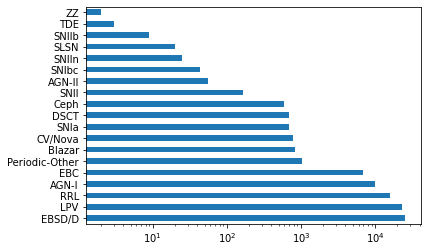

In [31]:
labels = labels.loc[labels.index.isin(df.index)].classALeRCE
labels.value_counts().plot.barh()
plt.xscale('log')

## Can you visualize the data?

Not easily, the dataset has too many dimensions.

## Can you solve the problem just by looking at the data?

Maybe...

# Detailed analysis

## Are the variables independent, what are the correlations?

Let's compute the covariance matrix using pandas. We will try this with the original and two versions of the transformed data.

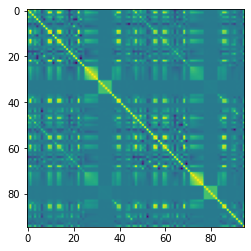

In [32]:
cm = df.corr() # if you use cov the covariance will not be normalized, try that as well
plt.imshow(cm)

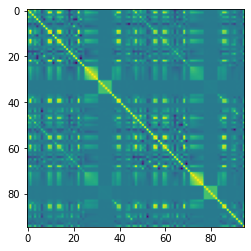

In [33]:
cm = dft.corr()
plt.imshow(cm)

We don't see much difference between df and dft because the correlation matrix is already normalized. 

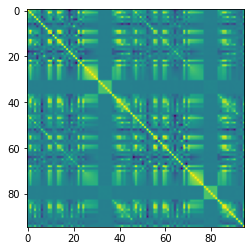

In [34]:
cm = dft2.corr() #c.f. cov
plt.imshow(cm)

In the last version, where the power transform was used, we can see more structure. Let's zoom in and add the labels to see if this makes sense.

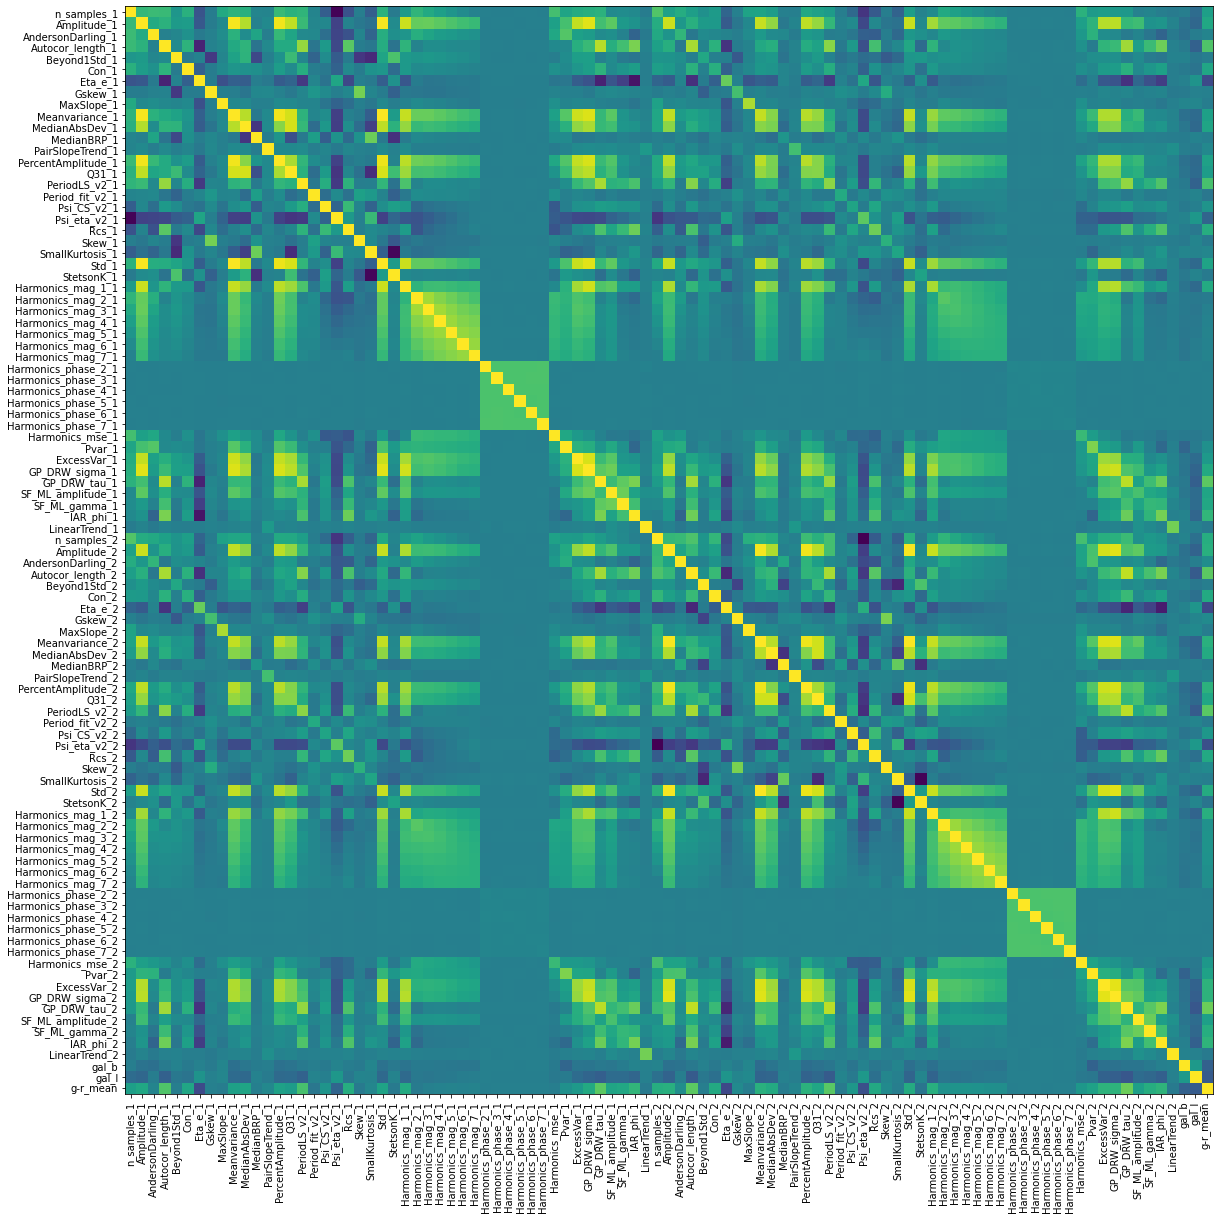

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(cm)
ax.set_yticks(range(dft2.shape[1]))
ax.set_yticklabels(list(dft2));
ax.set_xticks(range(dft2.shape[1]))
ax.set_xticklabels(list(dft2), rotation=90);

One can see clusters where variables are correlated, as well as two off diagonal lines that relate the variables in the two filters of the telescope.

## Do you need to reduce the dimensionality of the data?

We will use UMAP to transform and visualize the data in a lower dimensional space (as we did in the preprocessing class).

In [36]:
import umap
reducer = umap.UMAP()

# try this and the next two cells using df, dft and dft2
df_umap = reducer.fit_transform(dft2.fillna(-99))

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
order = ['SNIbc', 'SNII', 'SNIIn', 'SNIIb', 'SNIa', 'SLSN', 'TDE',
       'CV/Nova', 'AGN-I', 'AGN-II', 'QSO', 'Blazar', 'YSO', 
       'DSCT', 'ZZ', 'RRL','EBSD/D', 'EBC', 'Ceph', 'LPV', 'RSCVn', 'Periodic-Other']
le.fit(order)
# force given order
le.classes_ = np.array(order)
y = le.transform(labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


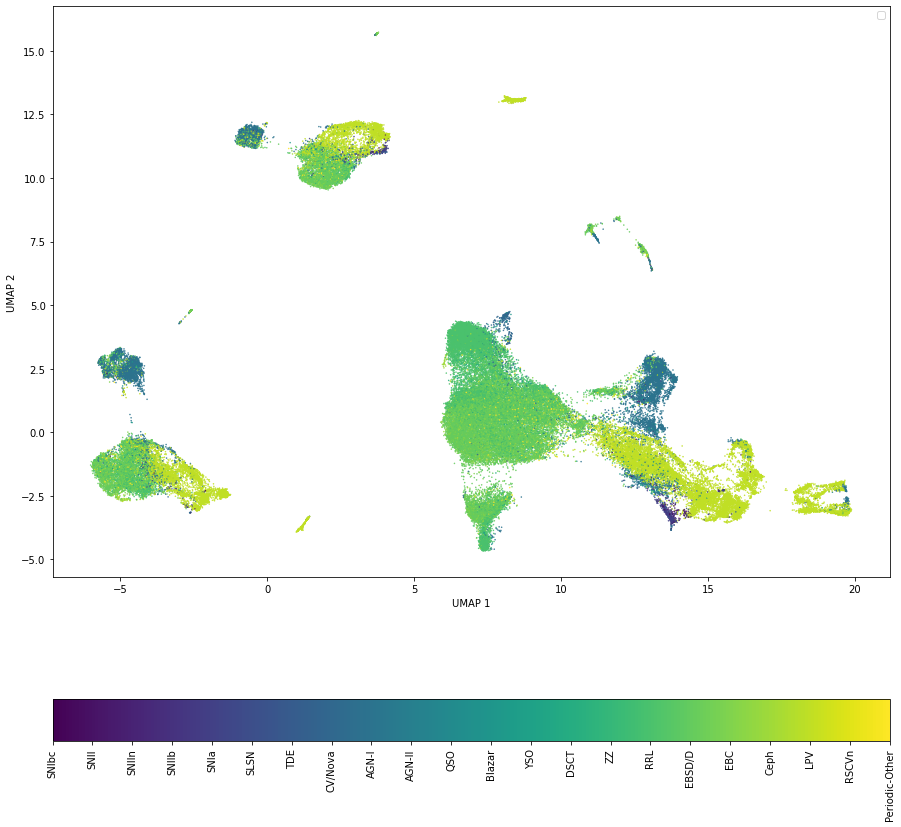

In [38]:
fig, ax = plt.subplots(figsize = (15, 15), sharex = True)
cax = ax.scatter(df_umap[:, 0], df_umap[:, 1], c=y, marker='.', s=1)#, cmap=plt.cm.get_cmap('tab20c')
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
plt.show()

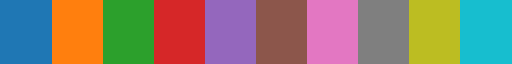

In [65]:
plt.cm.get_cmap('tab10')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


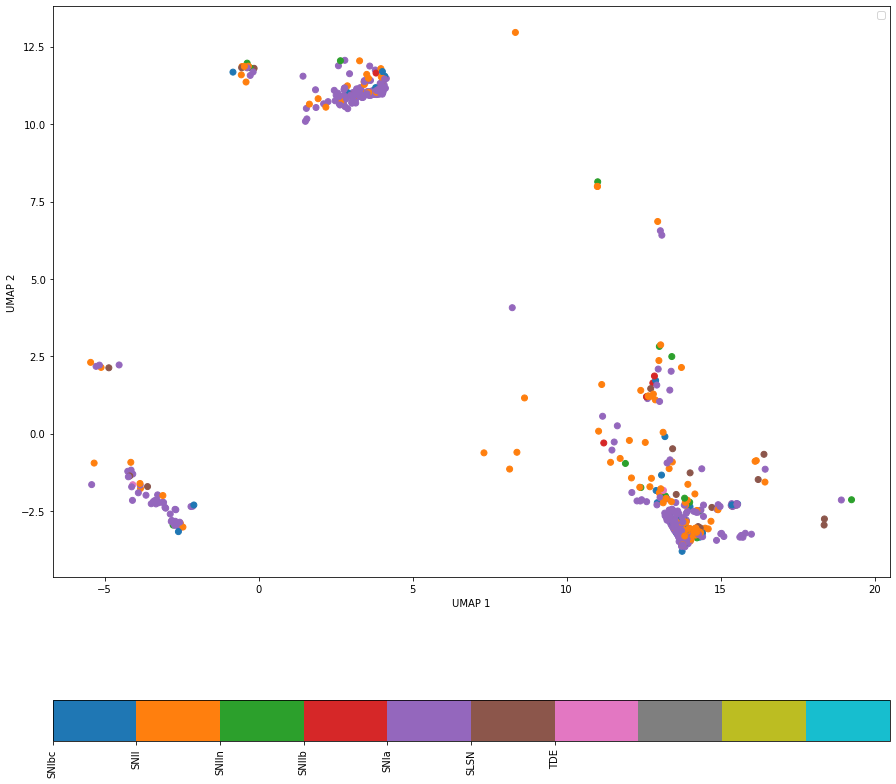

In [66]:
fig, ax = plt.subplots(figsize = (15, 15), sharex = True)
tran = ['SNIbc', 'SNII', 'SNIIn', 'SNIIb', 'SNIa', 'SLSN', 'TDE']
mask = labels.isin(tran)
cax = ax.scatter(df_umap[mask, 0], df_umap[mask, 1], c=y[mask], cmap=plt.cm.get_cmap('tab10'),
                 vmin=le.transform(tran)[0], vmax=le.transform(tran)[0]+10)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y[mask].max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y[mask].max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


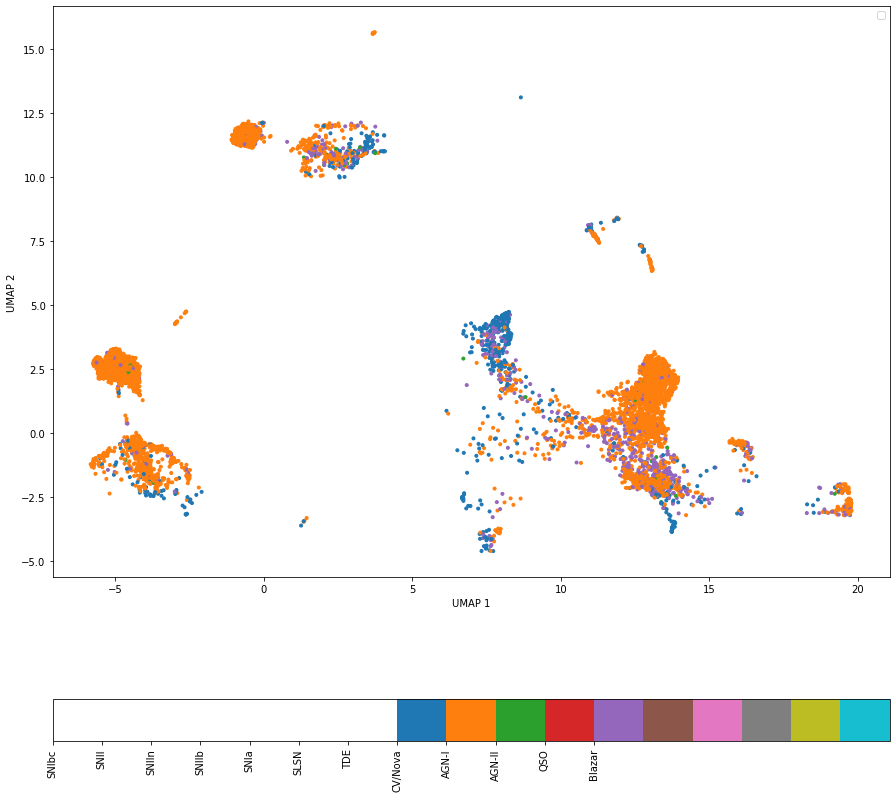

In [67]:
fig, ax = plt.subplots(figsize = (15, 15), sharex = True)
stoch = ['CV/Nova', 'AGN-I', 'AGN-II', 'QSO', 'Blazar', 'YSO']
mask = labels.isin(stoch)
cax = ax.scatter(df_umap[mask, 0], df_umap[mask, 1], c=y[mask], marker='.',
                 cmap=plt.cm.get_cmap('tab10'), vmin=le.transform(stoch)[0], vmax=le.transform(stoch)[0]+10)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y[mask].max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y[mask].max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


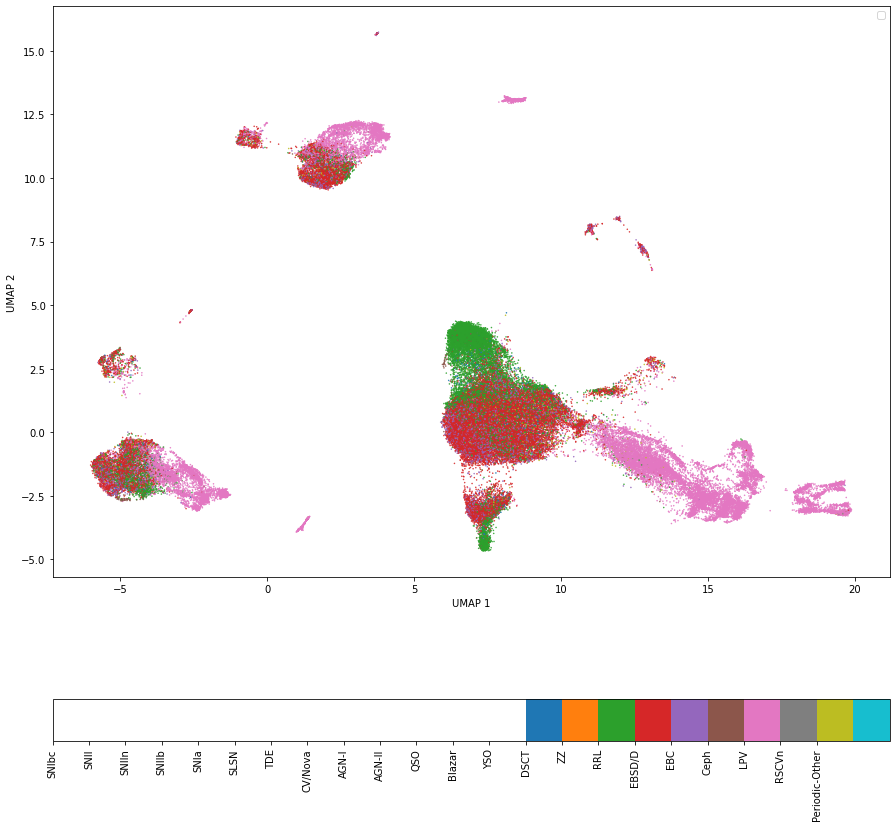

In [68]:
fig, ax = plt.subplots(figsize = (15, 15), sharex = True)
per = ['DSCT', 'ZZ', 'RRL','EBSD/D', 'EBC', 'Ceph', 'LPV', 'RSCVn', 'Periodic-Other']
mask = labels.isin(per)
cax = ax.scatter(df_umap[mask, 0], df_umap[mask, 1], c=y[mask], marker='.', s=1,
                 cmap=plt.cm.get_cmap('tab10'), vmin=le.transform(per)[0], vmax=le.transform(per)[0]+10)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();
cbar = plt.colorbar(cax, orientation='horizontal')
cbar.ax.set_xticks(np.array(range(y[mask].max()+1)), 
                   labels=[le.inverse_transform([i])[0] for i in (np.array(range(y[mask].max()+1)))])
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
plt.show()

## Can you do unsupervised clustering?

We could do it, but it may not give very good results. We will use DBSCAN to see what would have happened.

In [136]:
from sklearn.cluster import DBSCAN
from statistics import mode
from matplotlib import colors

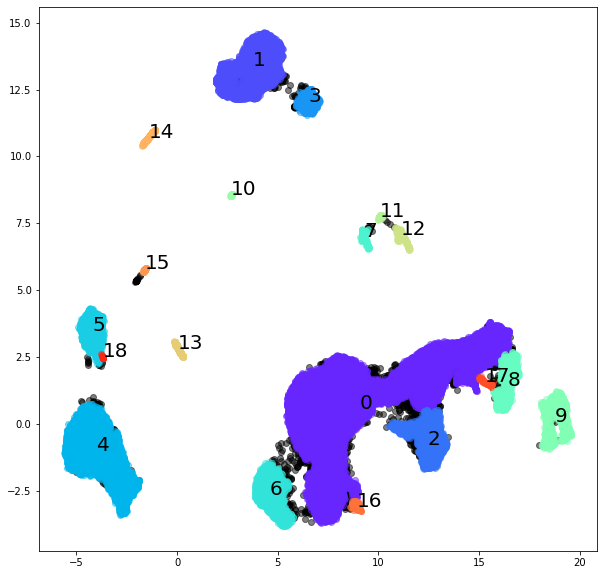

In [138]:
fig, ax = plt.subplots(figsize = (10, 10))
DBSCAN_model = DBSCAN(eps = .13, min_samples = 20, metric='euclidean', \
                      metric_params=None, algorithm='auto', leaf_size=30)
X = df_umap
DBSCAN_model.fit(X)
lbls = np.array(DBSCAN_model.labels_)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=len(np.unique(lbls)))
for idx, label in enumerate(np.unique(lbls)):
    mask= label == lbls
    c = cmap(norm(idx))
    t = label
    if label == -1:
        c = 'k'
        t = ""
    ax.scatter(X[mask, 0], X[mask, 1], color = c, alpha = 0.5)
    ax.text(np.average(X[mask, 0]), np.average(X[mask, 1]), t, fontsize = 20)

## Is there a data imbalance problem?

Yes, we saw this when we obtained the labels. If so, can you fix it?

In [142]:
labels

oid
ZTF17aacjwvd            EBSD/D
ZTF17aadecrr            EBSD/D
ZTF18adaksvf    Periodic-Other
ZTF18abtqdih               EBC
ZTF18abshynt               LPV
                     ...      
ZTF17aaanuhy            EBSD/D
ZTF18acaacpv            EBSD/D
ZTF19aaerbju               LPV
ZTF17aadjqxn               LPV
ZTF18aacgwmn             AGN-I
Name: classALeRCE, Length: 86463, dtype: object

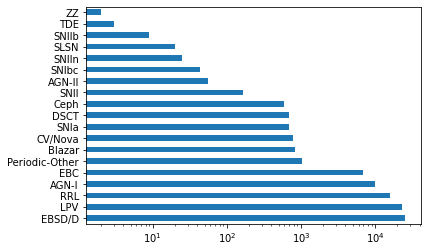

In [143]:
labels.value_counts().plot.barh()
plt.xscale('log')

We could fix this by under or oversampling.

## If classification or regression, plot the variables divided by class or range of variable to predict.

Let's plot the cumulative distribution of some variables we know will be important, e.g. Period_LS_v2_2. In this case we will use the original, untransformed data because we know it must be positive.

/home/fforster/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


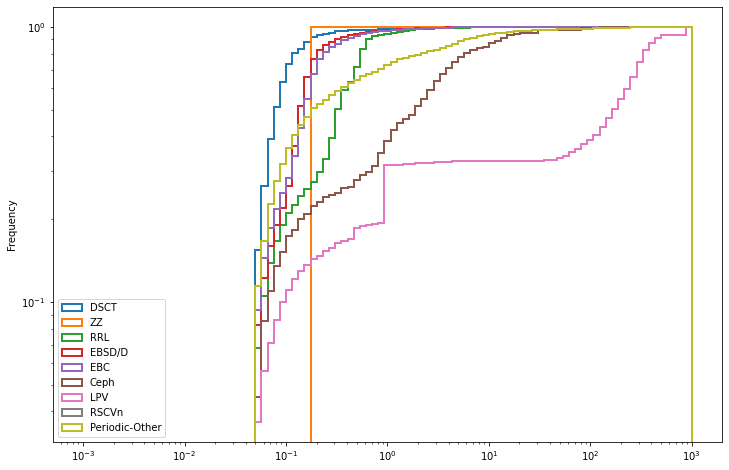

In [397]:
fig, ax = plt.subplots(figsize=(12, 8))
for cl in per:
    df.loc[labels == cl].PeriodLS_v2_2.plot.hist(bins=np.logspace(-3, 3, 100), log=True, cumulative=True, density=True, label=cl, histtype='step', lw=2)
ax.legend(loc=3)
ax.set_xscale('log')

Now we will do a Kolmogorov Smirnov test for every pair of distributions, now using the transformed variables. We will sample 100 times with repetition to do the test.

In [236]:
from scipy import stats

In [240]:
def KS2p(cl1, cl2, var):
    return np.log10(stats.ks_2samp(dft2.loc[labels==cl1][var].fillna(-99).sample(100, replace=True), dft2.loc[labels==cl2][var].fillna(-99).sample(100, replace=True)).pvalue)
var = 'PeriodLS_v2_2'
pm = np.zeros((len(per), len(per)))
for idx1, cl1 in enumerate(per):
    for idx2, cl2 in enumerate(per):
        if idx1 < idx2:
            continue
        if (labels==cl1).sum() == 0 or (labels==cl2).sum() == 0:
            continue
        pm[idx1, idx2] = KS2p(cl1, cl2, var)
        print(cl1, cl2)
        print(KS2p(cl1, cl2, var))

DSCT DSCT
-0.8101205775302981
ZZ DSCT
-10.530409895344771
ZZ ZZ
-0.002510679139184515
RRL DSCT
-14.609391412509565
RRL ZZ
-15.752727877806953
RRL RRL
-0.4339306224954569
EBSD/D DSCT
-10.530409895344771
EBSD/D ZZ
-8.355147408328953
EBSD/D RRL
-9.627241124773128
EBSD/D EBSD/D
-0.8101205775302981
EBC DSCT
-6.808247532991422
EBC ZZ
-3.6480608867325905
EBC RRL
-10.998930978302516
EBC EBSD/D
-0.5498407940781076
EBC EBC
-1.26839448433126
Ceph DSCT
-10.530409895344771
Ceph ZZ
-14.05694443658652
Ceph RRL
-6.447449332323951
Ceph EBSD/D
-11.970585429175927
Ceph EBC
-9.192317549847921
Ceph Ceph
-0.00013498785800883394
LPV DSCT
-17.56728029596316
LPV ZZ
-23.043404764658483
LPV RRL
-12.989458485518684
LPV EBSD/D
-21.581580810820714
LPV EBC
-17.56728029596316
LPV Ceph
-12.474035622617938
LPV LPV
-1.4390861208117998
Periodic-Other DSCT
-5.105121539720574
Periodic-Other ZZ
-10.073226970567298
Periodic-Other RRL
-4.201958982842606
Periodic-Other EBSD/D
-2.653659558733711
Periodic-Other EBC
-3.9202341423

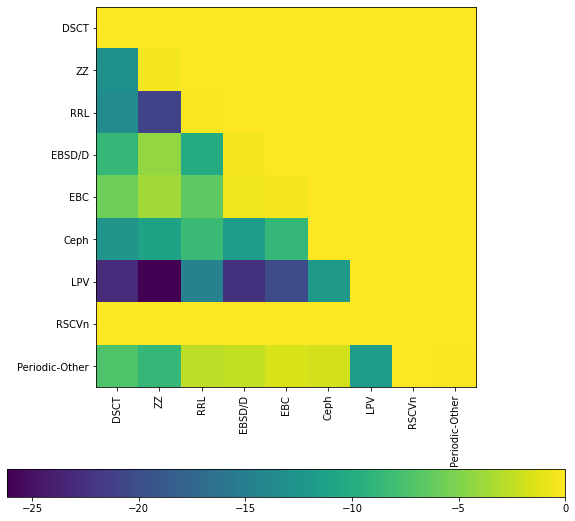

In [398]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(pm)
ax.set_yticks(range(len(per)))
ax.set_yticklabels(per);
ax.set_xticks(range(len(per)))
ax.set_xticklabels(per, rotation=90);
cbar = plt.colorbar(cax, orientation='horizontal')

It makes sense that the ZZ and LPC classes gave the most significant result.

Let's build a function that gives the most significant p-value for the given variable.

In [399]:
def minpvalue(var, sel):
    minp = 0
    for idx1, cl1 in enumerate(sel):
        for idx2, cl2 in enumerate(sel):
            if idx1 < idx2:
                continue
            if (labels==cl1).sum() == 0 or (labels==cl2).sum() == 0:
                continue
            aux = KS2p(cl1, cl2, var)
            if aux < minp:
                minp = aux
    return minp

minpvalue("PeriodLS_v2_2", per)

-26.172483625249754

Let's now try this for all the variables using the three groups of classes and all the classes!

In [247]:
pvals = {}
pvals_tran = {}
pvals_per = {}
pvals_stoch = {}
for var in list(df):
    print(var)
    pvals[var] = minpvalue(var, order)
    pvals_tran[var] = minpvalue(var, tran)
    pvals_per[var] = minpvalue(var, per)
    pvals_stoch[var] = minpvalue(var, stoch)

n_samples_1
Amplitude_1
AndersonDarling_1
Autocor_length_1
Beyond1Std_1
Con_1
Eta_e_1
Gskew_1
MaxSlope_1
Meanvariance_1
MedianAbsDev_1
MedianBRP_1
PairSlopeTrend_1
PercentAmplitude_1
Q31_1
PeriodLS_v2_1
Period_fit_v2_1
Psi_CS_v2_1
Psi_eta_v2_1
Rcs_1
Skew_1
SmallKurtosis_1
Std_1
StetsonK_1
Harmonics_mag_1_1
Harmonics_mag_2_1
Harmonics_mag_3_1
Harmonics_mag_4_1
Harmonics_mag_5_1
Harmonics_mag_6_1
Harmonics_mag_7_1
Harmonics_phase_2_1
Harmonics_phase_3_1
Harmonics_phase_4_1
Harmonics_phase_5_1
Harmonics_phase_6_1
Harmonics_phase_7_1
Harmonics_mse_1
Pvar_1
ExcessVar_1
GP_DRW_sigma_1
GP_DRW_tau_1
SF_ML_amplitude_1
SF_ML_gamma_1
IAR_phi_1
LinearTrend_1
n_samples_2
Amplitude_2
AndersonDarling_2
Autocor_length_2
Beyond1Std_2
Con_2
Eta_e_2
Gskew_2
MaxSlope_2
Meanvariance_2
MedianAbsDev_2
MedianBRP_2
PairSlopeTrend_2
PercentAmplitude_2
Q31_2
PeriodLS_v2_2
Period_fit_v2_2
Psi_CS_v2_2
Psi_eta_v2_2
Rcs_2
Skew_2
SmallKurtosis_2
Std_2
StetsonK_2
Harmonics_mag_1_2
Harmonics_mag_2_2
Harmonics_mag_3_2
H

<AxesSubplot:>

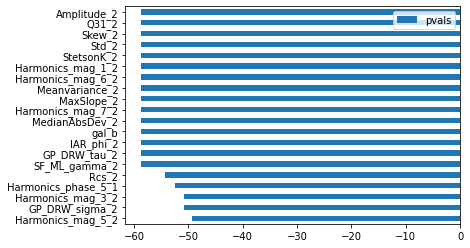

In [301]:
pd.DataFrame(data=pvals.values(), index=pvals.keys(), 
             columns=['pvals']).sort_values(by='pvals').iloc[::-1].iloc[-20:].plot.barh()

<AxesSubplot:>

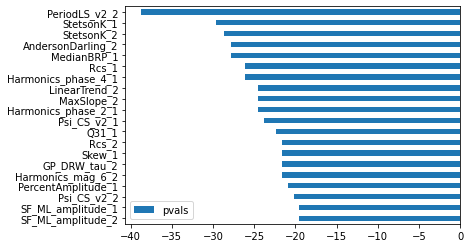

In [300]:
pd.DataFrame(data=pvals_tran.values(), index=pvals_tran.keys(), 
             columns=['pvals']).sort_values(by='pvals').iloc[::-1].iloc[-20:].plot.barh()

<AxesSubplot:>

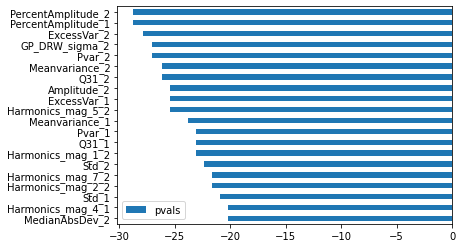

In [299]:
pd.DataFrame(data=pvals_stoch.values(), index=pvals_stoch.keys(), 
             columns=['pvals']).sort_values(by='pvals').iloc[::-1].iloc[-20:].plot.barh()

<AxesSubplot:>

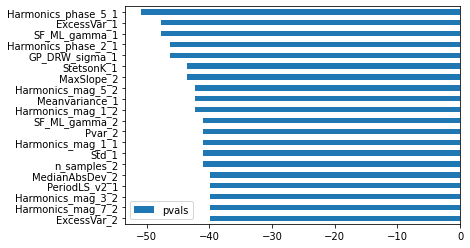

In [298]:
pd.DataFrame(data=pvals_per.values(), index=pvals_per.keys(), 
             columns=['pvals']).sort_values(by='pvals').iloc[::-1].iloc[-20:].plot.barh()

## Compute feature importance using random forest classifier

We will try using a standard random forest, a balanced random forest, and balanced random forest separated by different families of objects within the sample.

In [76]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

We will try different methods and subsets of the data and will keep the best features according to each method using a python set.

In [78]:
bestfeatures = set()

In [79]:
forest = RandomForestClassifier()
forest.fit(dft2.fillna(-99), labels)

RandomForestClassifier()

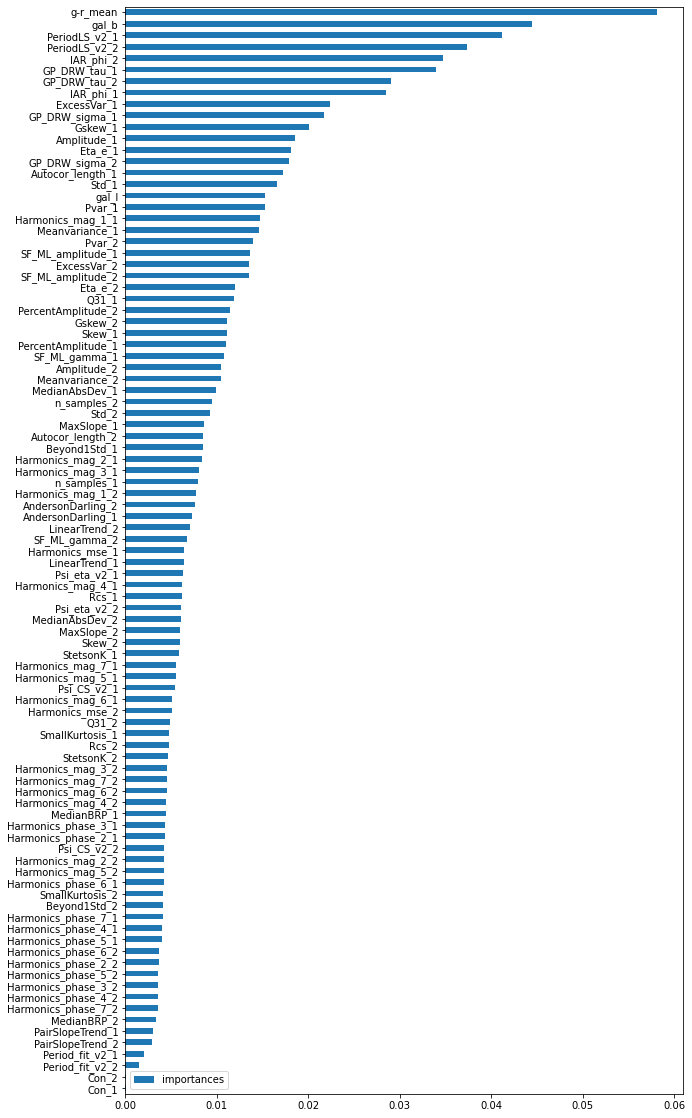

In [80]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(dft2)
imps.sort_values(by="importances").plot.barh(figsize=(10, 20))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [89]:
forest = BalancedRandomForestClassifier()
forest.fit(dft2.fillna(-99), labels)

BalancedRandomForestClassifier()

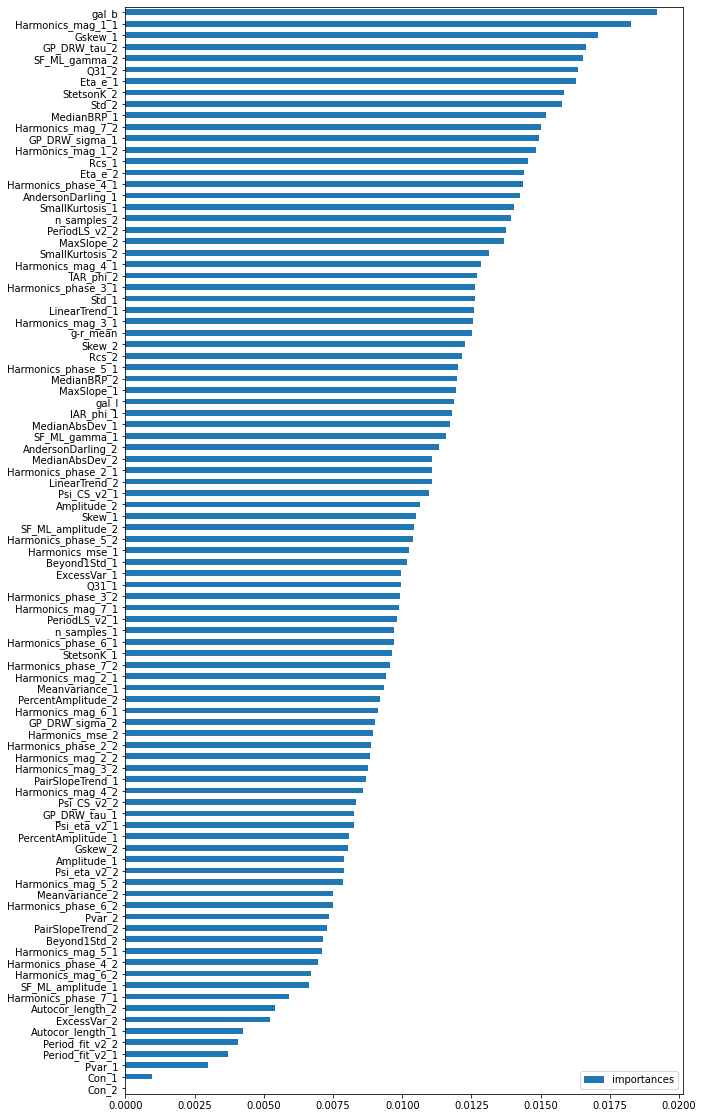

In [90]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(dft2)
imps.sort_values(by="importances").plot.barh(figsize=(10, 20))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index)

In [91]:
forest = BalancedRandomForestClassifier()
mask = labels.isin(tran)
forest.fit(dft2[mask].fillna(-99), labels[mask])

BalancedRandomForestClassifier()

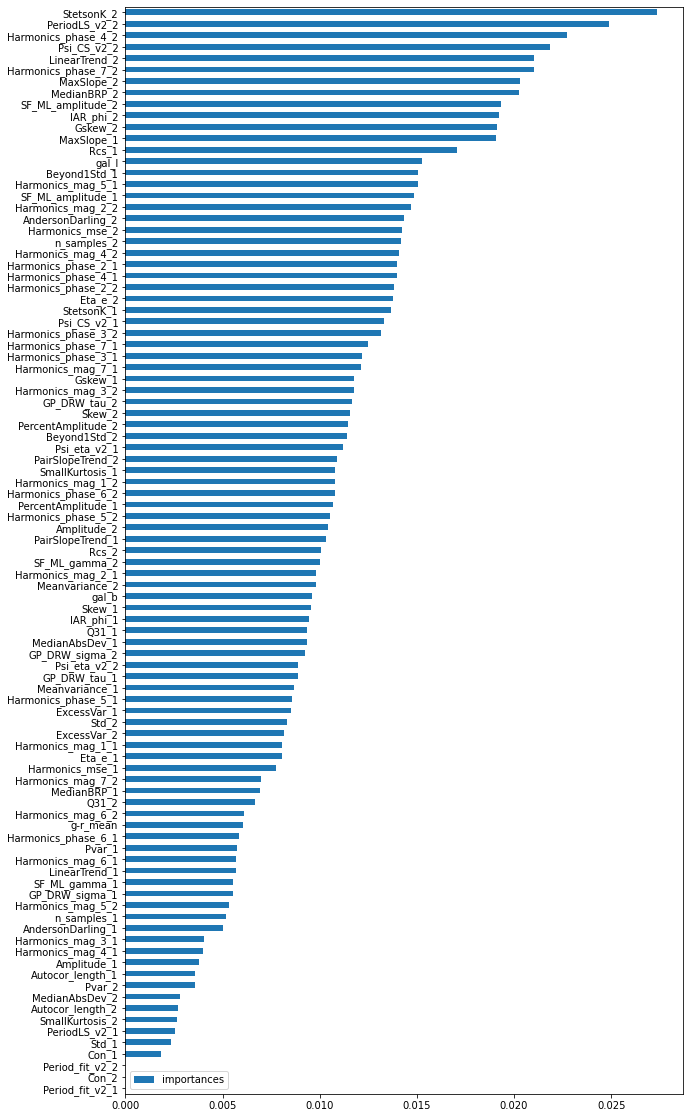

In [92]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(dft2)
imps.sort_values(by="importances").plot.barh(figsize=(10, 20))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index)

In [93]:
forest = BalancedRandomForestClassifier()
mask = labels.isin(stoch)
forest.fit(dft2[mask].fillna(-99), labels[mask])

BalancedRandomForestClassifier()

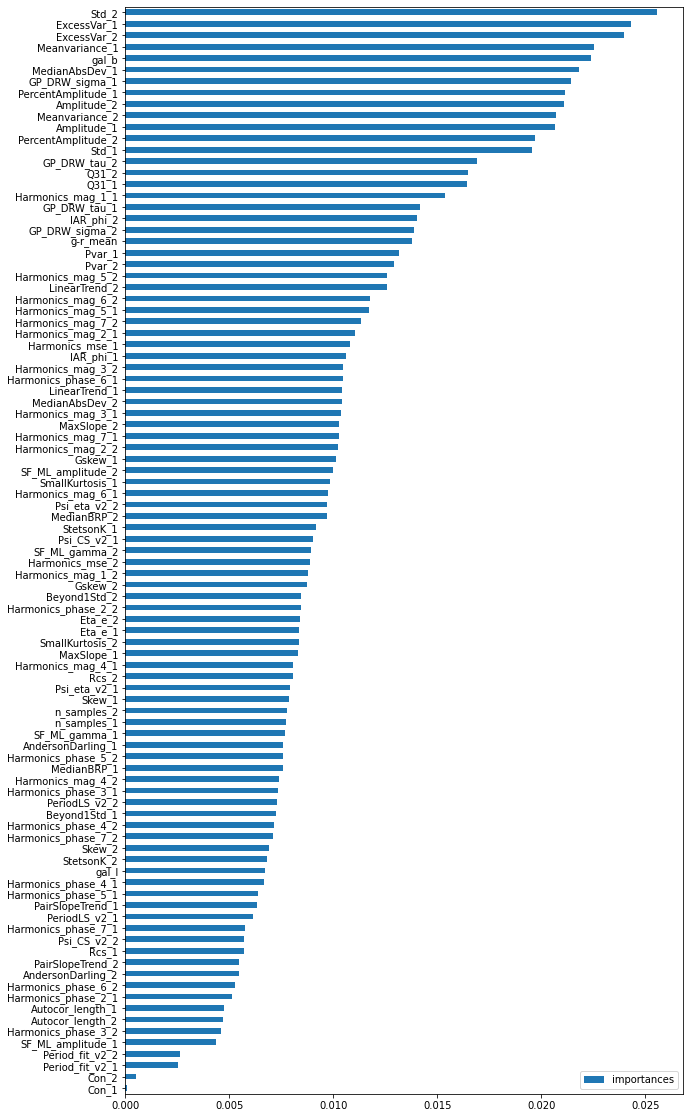

In [94]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(dft2)
imps.sort_values(by="importances").plot.barh(figsize=(10, 20))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index)

In [95]:
forest = BalancedRandomForestClassifier()
mask = labels.isin(per)
forest.fit(dft2[mask].fillna(-99), labels[mask])

BalancedRandomForestClassifier()

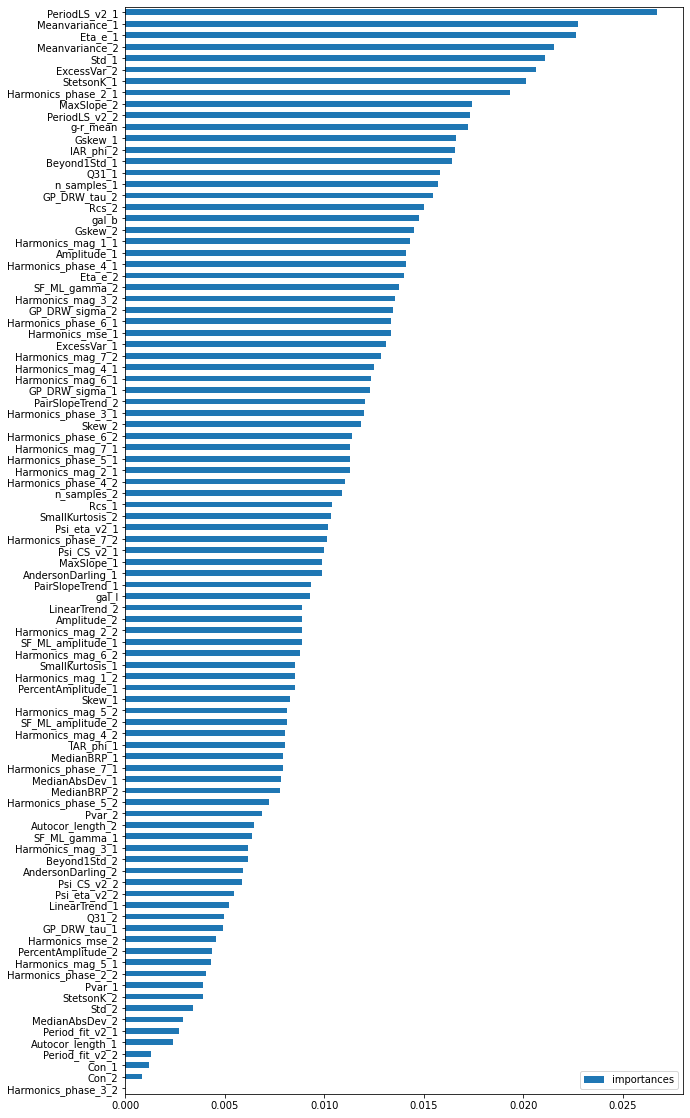

In [96]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(dft2)
imps.sort_values(by="importances").plot.barh(figsize=(10, 20))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index)

We can then select the union of the top N features from all the previous test for our final feature selection.

These are the best features considering all the previous classifiers and class subsets:

In [100]:
len(bestfeatures)

51

In [101]:
bestfeatures

{'Amplitude_1',
 'Amplitude_2',
 'AndersonDarling_1',
 'Autocor_length_2',
 'Eta_e_1',
 'ExcessVar_1',
 'ExcessVar_2',
 'GP_DRW_sigma_1',
 'GP_DRW_sigma_2',
 'GP_DRW_tau_1',
 'GP_DRW_tau_2',
 'Gskew_1',
 'Gskew_2',
 'Harmonics_mag_1_1',
 'Harmonics_mag_2_1',
 'Harmonics_mag_2_2',
 'Harmonics_mag_4_1',
 'Harmonics_mag_6_1',
 'Harmonics_mag_7_1',
 'Harmonics_mag_7_2',
 'Harmonics_phase_2_1',
 'Harmonics_phase_3_1',
 'Harmonics_phase_4_2',
 'Harmonics_phase_6_1',
 'Harmonics_phase_7_2',
 'IAR_phi_1',
 'IAR_phi_2',
 'LinearTrend_2',
 'MaxSlope_2',
 'Meanvariance_1',
 'Meanvariance_2',
 'MedianAbsDev_1',
 'MedianBRP_1',
 'MedianBRP_2',
 'PercentAmplitude_1',
 'PercentAmplitude_2',
 'PeriodLS_v2_1',
 'PeriodLS_v2_2',
 'Psi_CS_v2_2',
 'Psi_eta_v2_2',
 'Q31_2',
 'SF_ML_amplitude_2',
 'SF_ML_gamma_2',
 'Skew_1',
 'Skew_2',
 'Std_1',
 'Std_2',
 'StetsonK_1',
 'StetsonK_2',
 'g-r_mean',
 'gal_b'}

## Can you define more features?

This is perhaps the most important and difficult part. This requires looking at the data and talking to the domain experts.

There are libraries specialized for time series (e.g. tsfresh), images (opencv), clouds of points (pyntcloud), Huggingface for transformers...